# Network Motifs of two nodes: Feed-forward loops

One of the most common network motifs called in [__feedforward loop__](https://www.pnas.org/content/100/21/11980).  This [minimal network topology](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2896310/), appears hundreds of times in bacteria and in the transcriptional networks of human embryonic stem cells, hematopoietic stem stem cells, and downstream of the Notch signaling pathway.

A feedforward loop motif is formed when a given gene is regulated upstream by a transcription factor `T` via two different paths. 

To test the properties of the feedforward loops we will use the approach of the Central Dogma, by combining two interacting genes in a network that respond to the same stimuly in the form of a transcription factor `T`. To complete the feedforward loop, we  add an additional donwstream interaction between $P_1$ and $P_2$. 
Feedforward lops can be of tow main types:

- Coherent: The sign of the regulation of the target is the same in both paths.
- Incoherent: The sign of the regulation of the target is not the same in both paths. 

We will look at what type of properties both coherent and incoherent feedforward loops provide to a signal regulatory network separately.

## Coherent Feed-forward loops

We can think of teh activation of gene 2 as an `AND` logic gate, i.e., it is only `on` when two inputs are driving its expression. To built a simplified network motif with a coherent feedforward loop, we will simply add and extra Hill Function $\Gamma(P_1,K)$ responsible for the activation of transcription of `mRNA2`. The set of interactions that we will take into account is the following:

$$
\begin{matrix}
\Psi (T,K) &\overset{α_M}{\longrightarrow}& M_1 & \tag{1} \\ 
M_1 &\overset{\gamma_M}{\longrightarrow}& 0 & \\
M_1 &\overset{\alpha_P}{\longrightarrow}& P_1  & \\
P_1 &\overset{\gamma_P}{\longrightarrow}& 0 &
\end{matrix}
$$

$$
\begin{matrix}
\Psi (T,K) \cdot \Gamma (P_1,K) &\overset{α_M}{\longrightarrow} & M_2& \tag{1} \\ 
M_2 &\overset{\gamma_M}{\longrightarrow} & 0 &\\
M_2 &\overset{\alpha_P}{\longrightarrow} & P_2 &\\
P_2 &\overset{\gamma_P}{\longrightarrow} & 0 &
\end{matrix}
$$

In [ ]:
using Plots; gr()
using DifferentialEquations

Therefore, the set of differential equations that corresponds to this scheme is simply: 

$$
\begin{align*}
   \frac{\mathrm{d} [M_1]}{\mathrm{d} t} &=  -γ_M*M_1+ α_M \frac{T^n}{K^n +T^n}\frac{P_1^n}{K^n +P_1^n}\\
   \frac{\mathrm{d} [P_1]}{\mathrm{d} t} &=   α_P * M_1 - γ_P * P_1 \\
   \frac{\mathrm{d} [M_2]}{\mathrm{d} t} &= -γ_M*M_2+ \frac{α_M*T^n}{K^n +T^n}\\
   \frac{\mathrm{d} [P_2]}{\mathrm{d} t} &=   α_P * M_2 - γ_P * P_2
\end{align*}
$$

In [2]:
FeedForward1! = @ode_def ab begin
   dM1 = -γ_M*M1+α_M*T^n/(K^n +T^n)
   dP1 =   α_P * M1 - γ_P * P1 
   dM2 = -γ_M*M2+ α_M*T^n/(K^n +T^n)*P1^n/(K^n +P1^n)
   dP2 =   α_P * M2 - γ_P * P2 
    end α_M γ_M T n α_P γ_P K

NoForward1! = @ode_def ab begin
   dM1 = -γ_M*M1+α_M*T^n/(K^n +T^n)
   dP1 =   α_P * M1 - γ_P * P1 
   dM2 = -γ_M*M2+ α_M*T^n/(K^n +T^n)
   dP2 =   α_P * M2 - γ_P * P2 
    end α_M γ_M T n α_P γ_P K

(::ab{getfield(Main, Symbol("##11#15")),getfield(Main, Symbol("##12#16")),getfield(Main, Symbol("##13#17")),Nothing,Nothing,getfield(Main, Symbol("##14#18")),Expr,Expr}) (generic function with 2 methods)

### Coherent Feedforward loops introduce a delay

Similarly to positive feedback loops with cooperativity, coherent feedforward loops introduce a time between activation of `T` as input and the downstream response. We will test this numerically, using the functions defined above.

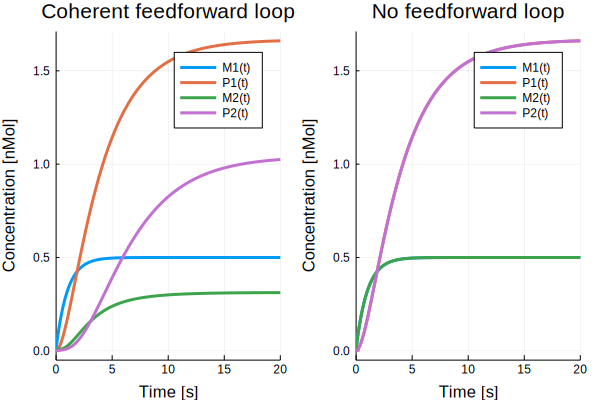

In [14]:
tspan = (0.0,20.0)
n=1
k_M=1
K=1
D=1
α_M=k_M*D
γ_M=1
α_P=1
γ_P2P1=1
γ_P=0.3
T=1

p=[α_M,γ_M,T,n,α_P,γ_P,K];
u₀ = [0.01,0.00001,0.01,0.00001]

prob1 = ODEProblem(FeedForward1!,u₀,tspan,p)
sol1 = solve(prob1)
P1=plot(sol1)
title!("Coherent feedforward loop")
xlabel!("Time [s]")
ylabel!("Concentration [nMol]")

prob2 = ODEProblem(NoForward1!,u₀,tspan,p)
sol2 = solve(prob2)
P2=plot(sol2)
title!("No feedforward loop")
xlabel!("Time [s]")
ylabel!("Concentration [nMol]")

plot(P1,P2,layout=(1,2),legend=true)

As we can see from the previous plot, the __coherent feedforward loop__ introduces a delay in the activation of the transcription of `mRNA2`, and therefore, in the production of protein. You probably remember that delays were also a result of positive feedback loops when cooperativity is added. The advantage of the feedforward loop is that induces a delay without cooperativity. 

### Coherent Feedforward loops reduces the sensitivity of the system

We will test the dependece of the sensitvity of the network against changes in the input `T`. To test this, we will compare the final steady state of a system with a feedforward loop and a simple linear network, while we change one of the parameters.  

In [29]:
function FeedForwardFunction!(T)
     p=[α_M,γ_M,T,n,α_P,γ_P,K];
     prob1 = ODEProblem(FeedForward1!,u₀,tspan,p)    
     x=("T = $(T)")
     sol1 = solve(prob1)
     P1=plot!(sol1,vars=(4),label=x,ylims = (0,1))
end

function NoForwardFunction!(T)
       p=[α_M,γ_M,T,n,α_P,γ_P,K];
       prob2 = ODEProblem(NoForward1!,u₀,tspan,p)
      x=("T = $(T)")
       sol2 = solve(prob2)
       P2=plot!(sol2,vars=(4),label=x,ylims = (0,1))
end

NoForwardFunction! (generic function with 1 method)

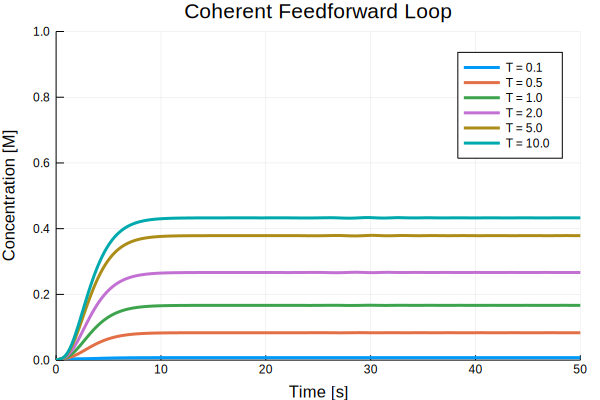

In [30]:
u₀ = [0.01,0.00001,0.01,0.00001]
tspan = (0.0,50.0)
n=1
k_M=1
K=1
D=1
α_M=k_M*D
γ_M=1
α_P=1
γ_P2P1=1
γ_P=1 # changes the amount of protein P
T=1

plot()
for i in [0.1,0.5,1,2,5,10]
    FeedForwardFunction!(i)
end
 title!("Coherent Feedforward Loop")
 xlabel!("Time [s]")
 ylabel!("Concentration [M]")

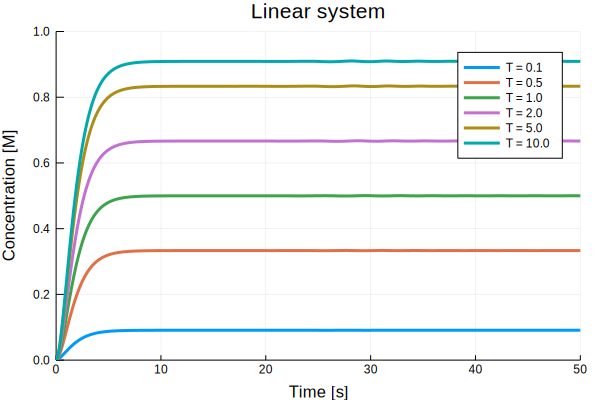

In [31]:
plot()
for i in [0.1,0.5,1,2,5,10]
    NoForwardFunction!(i)
end
 
 title!("Linear system")
 xlabel!("Time [s]")
 ylabel!("Concentration [M]")

So, there is important differences in the intensity of the expression of $P_2$. Since now $P_2$ requires two input signals to be activated ($T$ and $P_1$), the sensitivity is reduced againts changes in $T$. Intestingly, this is reminiscent of  a negative feedback loop. In conclusion, feedforward loops add

- Reduced sensitivity (as negative feedback loops)
- Delay between input and output (as positive feedback loops)

## Incoherent feedforward Loops

Also, one of the most common network motifs called __incoherent feedforward loop__.  This [minimal network topology](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2896310/), appears hundreds of times in bacteria and in the transcriptional networks of human embryonic stem cells, hematopoietic stem stem cells, and downstream of the Notch signaling pathway. We can think of the activation of gene 2 as an `OR` logic gate, i.e., it is only `on` when just one of the inputs is present.


To test the properties of the incoherent feedforward loop we will use the approach of the Central Dogma, by combining two interacting genes in a network that respond to the same stimuly in the form of a transcription factor `T`. Thsi way, an incoherent feedforward loop can be defined if we set the portein $P_1$ as a repressor of the the producntion of the gene `2`, following the scheme. 


$$
\begin{matrix}
\Psi (T,K) &\overset{α_M}{\longrightarrow}& M_1 & \tag{1} \\ 
M_1 &\overset{\gamma_M}{\longrightarrow}& 0 & \\
M_1 &\overset{\alpha_P}{\longrightarrow}& P_1  & \\
P_1 &\overset{\gamma_P}{\longrightarrow}& 0 &
\end{matrix}
$$

$$
\begin{matrix}
\Psi (T,K) \cdot \Gamma (P_1,K) &\overset{α_M}{\longrightarrow} & M_2& \tag{1} \\ 
M_2 &\overset{\gamma_M}{\longrightarrow} & 0 &\\
M_2 &\overset{\alpha_P}{\longrightarrow} & P_2 &\\
P_2 &\overset{\gamma_P}{\longrightarrow} & 0 &
\end{matrix}
$$


where now $\Gamma(P_1,K)$ is the repressive Hill function. The set of differential equations that corresponds to this scheme is simply: 

Therefore, the set of differential equations that corresponds to this scheme is simply: 

$$
\begin{align*}
   \frac{\mathrm{d} [M_1]}{\mathrm{d} t} &=  -γ_M*M_1+ α_M \frac{T^n}{K^n +T^n}\frac{K^n}{K^n +P_1^n}\\
   \frac{\mathrm{d} [P_1]}{\mathrm{d} t} &=   α_P * M_1 - γ_P * P_1 \\
   \frac{\mathrm{d} [M_2]}{\mathrm{d} t} &= -γ_M*M_2+ \frac{α_M*T^n}{K^n +T^n}\\
   \frac{\mathrm{d} [P_2]}{\mathrm{d} t} &=   α_P * M_2 - γ_P * P_2
\end{align*}
$$






In [45]:
FeedForward2! = @ode_def ab begin
   dM1 = -γ_M*M1+α_M*T^n/(K^n +T^n)
   dP1 =   α_P * M1 - γ_P * P1 
   dM2 = -γ_M*M2+α_M*T^n/(K^n +T^n)*K2^n/(K2^n +P1^n)
   dP2 =   α_P * M2 - γ_P * P2 
    end α_M γ_M T n α_P γ_P K K2

NoForward2! = @ode_def ab begin
   dM1 = -γ_M*M1+α_M*T^n/(K^n +T^n)
   dP1 =   α_P * M1 - γ_P * P1 
   dM2 = -γ_M*M2+ α_M*T^n/(K^n +T^n)
   dP2 =   α_P * M2 - γ_P * P2 
    end α_M γ_M T n α_P γ_P K K2

(::ab{getfield(Main, Symbol("##51#55")),getfield(Main, Symbol("##52#56")),getfield(Main, Symbol("##53#57")),Nothing,Nothing,getfield(Main, Symbol("##54#58")),Expr,Expr}) (generic function with 2 methods)

### Coherent Feedforward loops introduce a pulse

Similarly to negative feedback loops, incohenrent feedforward loops introduce a pulse of output protein $P_2$, despite that the input is continuous

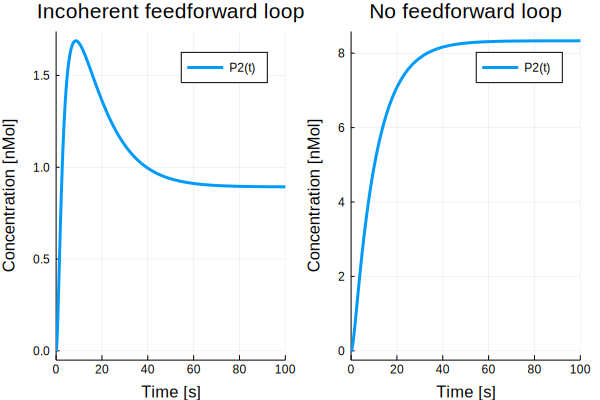

In [46]:
tspan = (0.0,100.0)
n=1
k_M=1
K=1
K2=1 # similar strength between T and P
D=1
α_M=k_M*D
γ_M=1
α_P=1
γ_P2P1=1
γ_P=0.1
T=5

p=[α_M,γ_M,T,n,α_P,γ_P,K,K2];

u₀ = [0.01,0.00001,0.01,0.00001]

prob1 = ODEProblem(FeedForward2!,u₀,tspan,p)
sol1 = solve(prob1)
P1=plot(sol1,vars=(4))
title!("Incoherent feedforward loop")
xlabel!("Time [s]")
ylabel!("Concentration [nMol]")

prob2 = ODEProblem(NoForward2!,u₀,tspan,p)
sol2 = solve(prob2)
P2=plot(sol2,vars=(4))
title!("No feedforward loop")
xlabel!("Time [s]")
ylabel!("Concentration [nMol]")

plot(P1,P2,layout=(1,2),legend=true)

Negative feedback loops require high cooperativity to introduce a pulse, but the incoherent feedforward loop does not need cooperativity. 

### Incoherent Feed-forward loops induce adaptation 

The capacity to adapt to changes in the external environment is a defining feature of living systems. Sometimes, a network or a subnetwork does is required respond only temporarily to a certain stimuly, while remaining insensitive if the exteral sitimuly persists. This phenomenon is called __adaptation__, and it is at teh core of many biological responses. Adaptation refers to the system’s ability to respond to a change in input stimulus then return to its prestimulated output level, even when the change in input persists. Examples of perfect or near perfect adaptation range from the chemotaxis of [bacteria, yeast, amoeba, and even mammals](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3068210/#R25). There are many ways to achieving adaptation at the level of a network. We will focus here, as an example of how adaptation works in one of the most common network motifs called __incoherent feedforward loop__.  This [minimal network topology](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2896310/), appears hundreds of times in bacteria and it has been 



In [9]:
function FeedForward2_function!(α_M,γ_M,T,n,α_P,γ_P,K,K2)
     p=[α_M,γ_M,T,n,α_P,γ_P,K,K2];
     prob1 = ODEProblem(FeedForward2!,u₀,tspan,p)
     sol1 = solve(prob1)
     x=("T = $(T)")
     plot!(sol1,vars=(4),label=x)
end

FeedForward2_function! (generic function with 1 method)

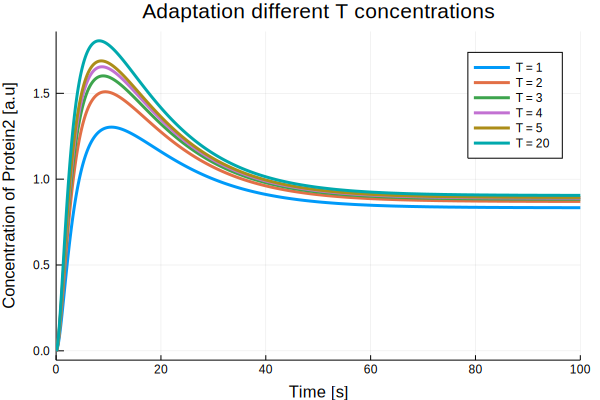

In [10]:
tspan = (0.0,100.0)
n=1
k_M=1
K=1
K2=1
D=1
α_M=k_M*D
γ_M=1
α_P=1
γ_P2P1=1
γ_P=0.1
T=13

p=[α_M,γ_M,T,n,α_P,γ_P,K,K2];
u₀ = [0.01,0.00001,0.01,0.00001]

plot()
for i in [1,2,3,4,5,20]
   FeedForward2_function!(α_M,γ_M,i,n,α_P,γ_P,K,K2)
end
title!("Adaptation different T concentrations")
xlabel!("Time [s]")
ylabel!("Concentration of Protein2 [a.u]")

Which is an inperfect adaptation, because the final steady state is not exacly the same. On the other hand, if we increase the strengh of the repression of $M_2$ by $P_1$ (by lowering the `K` of the corresponding Hill Function, we can achieve also perfect adaptation). 

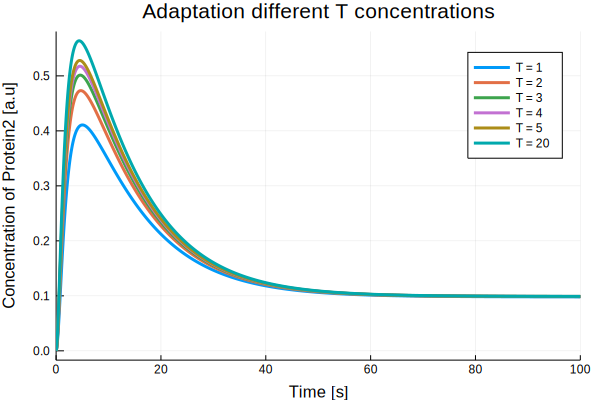

In [40]:
tspan = (0.0,100.0)
n=1
k_M=1
K=1
K2=0.1
D=1
α_M=k_M*D
γ_M=1
α_P=1
γ_P2P1=1
γ_P=0.1
T=13

p=[α_M,γ_M,T,n,α_P,γ_P,K,K2];
u₀ = [0.01,0.00001,0.01,0.00001]

plot()
for i in [1,2,3,4,5,20]
   FeedForward2_function!(α_M,γ_M,i,n,α_P,γ_P,K,K2)
end
title!("Adaptation different T concentrations")
xlabel!("Time [s]")
ylabel!("Concentration of Protein2 [a.u]")

We can see, that, even in the case of perfect adaptation, the intensisty of teh pulse depends on the output, but teh final stetady state is in deed independent. 
This occurs because the network requires the input to start functioning, but then then the two paths compete in regulating the output. When the longest path (the one acting $P_2$) dominates, the dependence on the intensity of the input is removed.  

This is a reminiscent property of a positive feedback: once the network is `on`, it remains on indeoendently of the input signal. 

In conclusion, the __incoherent feedforward loop__ has some of the properties that combine the features of positive and negative feedback:

- it generates a pulse (such as negative feedback loops with cooperativity).
- it introduces adaptation (similarly to positive feedbacks in some conditions).  